In [27]:
import pandas as pd
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2]:
#Objetivo --> meter los clusters también aquí

In [3]:
a = pd.read_csv("../data/perros_por_grupos_de_caracteristicas.csv")

In [4]:
b = pd.read_csv("../data/grupos.csv")

In [5]:
b

,grupetes
0,2
1,1
2,1
3,0
4,2
...,...
376,0
377,1
378,0
379,1


In [6]:
a["Groups"]= b

In [7]:
a.to_csv("../data/a_super_def.csv", index = False)

In [8]:
hola = pd.read_csv("../data/a_super_def.csv")

In [9]:
a.head(4)

,Name,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Tendency To Bark Or Howl,Wanderlust Potential,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,Behaviour,b_physical,g_physical,Groups
0,Afador,1,1,3,3,4,2,4,2,3,...,4,4,4,4,4,3,2.0,4.0,4.0,2
1,Affenhuahua,4,4,4,1,2,3,4,3,2,...,4,2,4,3,3,3,3.0,3.0,3.0,1
2,Affenpinscher,5,4,3,1,3,3,5,1,4,...,2,2,4,3,3,4,3.0,2.0,3.0,1
3,Afghan Hound,5,3,5,2,5,5,5,5,4,...,2,5,5,2,4,4,4.0,2.0,4.0,0


In [10]:
a.columns

Index(['Name', 'Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather',
       'Tolerates Hot Weather', 'Affectionate With Family', 'Kid-Friendly',
       'Dog Friendly', 'Friendly Toward Strangers', 'Amount Of Shedding',
       'Drooling Potential', 'Easy To Groom', 'General Health',
       'Potential For Weight Gain', 'Size', 'Easy To Train', 'Intelligence',
       'Potential For Mouthiness', 'Prey Drive', 'Tendency To Bark Or Howl',
       'Wanderlust Potential', 'Energy Level', 'Intensity', 'Exercise Needs',
       'Potential For Playfulness', 'Behaviour', 'b_physical', 'g_physical',
       'Groups'],
      dtype='object')

In [28]:
# Your code here
hola = a.corr()

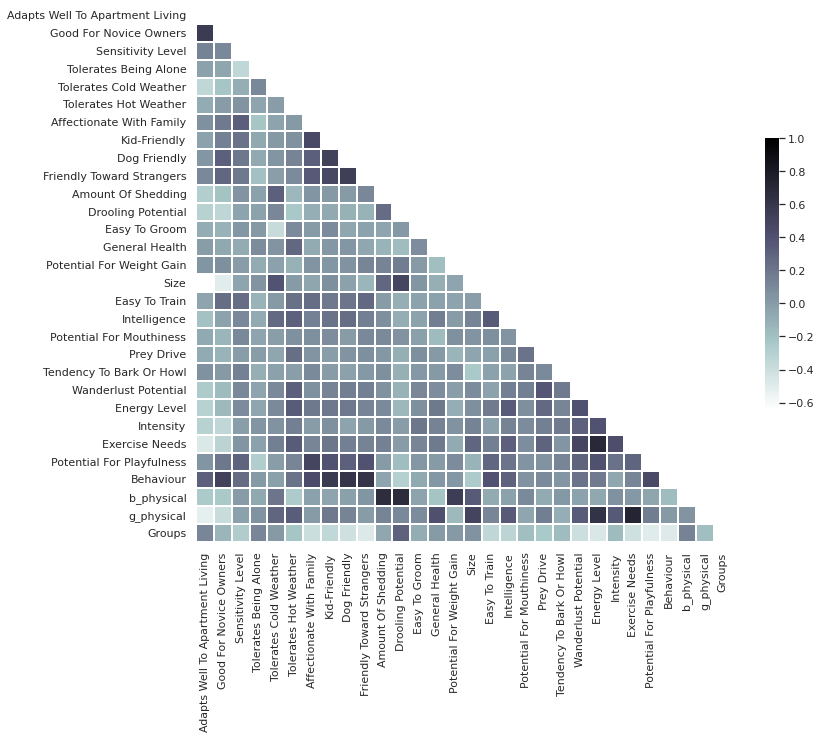

In [42]:
mascara5 = np.triu(np.ones_like(hola, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 7, as_cmap=True) # paleta de colores
sns.heatmap(hola,
            mask = mascara5,
            cmap='bone_r',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.2, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral
            
);

In [44]:
#si se adaptan se adaptan y son simpaticos en geneeral
#las características que he elegido
#entender datos
#poner otro criterio

In [45]:
para_corr_sin_grupetes = a.drop(['Behaviour', 'b_physical', 'g_physical',
       'Groups'], axis=1)

In [47]:
holis = para_corr_sin_grupetes.corr()

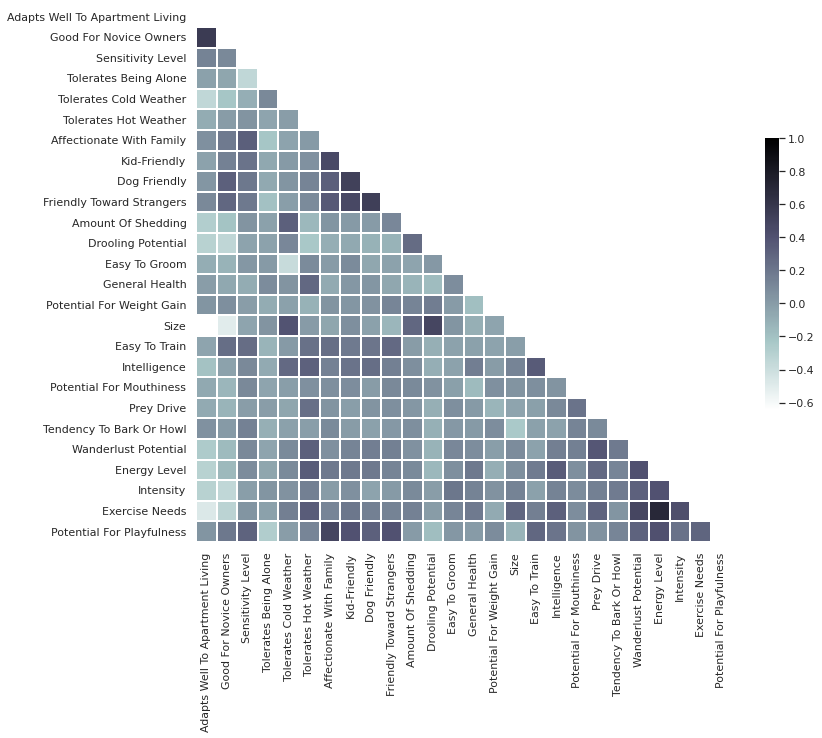

In [48]:
mascara5 = np.triu(np.ones_like(holis, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 7, as_cmap=True) # paleta de colores
sns.heatmap(holis,
            mask = mascara5,
            cmap='bone_r',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.2, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral
            
);

In [11]:
a = a.sort_values('Behaviour', ascending = False)

In [12]:
print("¿De qué tamaño te gustaría adoptar tu pero?: Grande, Mediano, Pequeño")
size = input()


#Primer filtro --> Tamaño
if size == "Grande":
    tamano = [4,5]
elif size == "Mediano":
    tamano = [3]
else:
    tamano = [1,2]
volumen = a[a.Size.isin(tamano)]


#Segundo filtro --> Pelo
print("¿Eres alérgicx al pelo de perro?: Sí/ No")
alergia = input()
if alergia == "Sí":
    pelo = [1,2]
else: 
    pelo = [1,2,3,4,5]    
pelete = volumen[volumen['Amount Of Shedding'].isin(pelo)]


#Tercer filtro --> Tiempo para pasear 
print("¿Cuánto tiempo tienes para pasear? Mucho/Intermedio/Poco")
tiempo = input()
if tiempo == "Mucho":
      horas = [1,2,3,4,5]
elif tiempo == "Intermedio":
      horas = [1,2,3]
else:
      horas = [1,2]        
paseo = pelete[pelete['Exercise Needs'].isin(horas)]


#Cuarto filtro --> Hijos pequeños 
print("¿Tienes hijos pequeños? Sí/No")
ninos = input()
if ninos == "Sí":
    hijo = [4,5]
else:
    hijo = [1,2,3,4,5]        
nino = paseo[paseo['Kid-Friendly'].isin(hijo)]

#Quinto filtro --> Otros perretes
print("¿Tienes ya otro perro? Sí/No")
perros_otro = input()
if perros_otro == "Sí":
    otro = [4,5]
else:
    otro = [1,2,3,4,5]        
perro = nino[nino['Dog Friendly'].isin(otro)]


¿De qué tamaño te gustaría adoptar tu pero?: Grande, Mediano, Pequeño
Mediano
¿Eres alérgicx al pelo de perro?: Sí/ No
No
¿Cuánto tiempo tienes para pasear? Mucho/Intermedio/Poco
Mucho
¿Tienes hijos pequeños? Sí/No
No
¿Tienes ya otro perro? Sí/No
No


In [13]:
perro.head(4)

,Name,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Tendency To Bark Or Howl,Wanderlust Potential,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,Behaviour,b_physical,g_physical,Groups
307,Puli,4,1,4,2,4,3,5,5,5,...,4,5,5,5,5,5,4.0,2.0,4.0,0
206,Harrier,1,3,2,3,3,4,4,5,5,...,4,5,5,4,5,5,4.0,2.0,4.0,0
302,Portuguese Water Dog,4,3,4,2,4,3,5,5,5,...,3,3,5,3,5,5,4.0,2.0,4.0,0
135,Clumber Spaniel,5,5,4,2,5,2,5,3,4,...,1,4,3,1,2,5,4.0,5.0,2.0,1


In [14]:
list(perro.head(1)["Size"])[0]

3

In [15]:
numero_estrellas_tamano = (list(perro.head(1)["Size"])[0])

if numero_estrellas_tamano == 5:
    print("si")

In [16]:
lista = perro.head(4).Name.unique()
c = len(lista)

In [17]:
lista

array(['Puli', 'Harrier', 'Portuguese Water Dog', 'Clumber Spaniel'],
      dtype=object)

In [18]:
cluster = int(perro[perro["Name"]== lista[0]].Groups)

In [19]:
type(cluster)
cluster

0

In [20]:
eleccion = perro.loc[(perro.Groups == cluster)]

In [21]:
for i in range(0,c):
    eleccion = eleccion[eleccion.Name != lista[i]]

eleccion = eleccion.head(4)
eleccion

,Name,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Tendency To Bark Or Howl,Wanderlust Potential,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,Behaviour,b_physical,g_physical,Groups
312,Redbone Coonhound,4,2,5,2,3,2,5,5,4,...,4,5,4,4,5,5,4.0,3.0,4.0,0
193,Golden Retriever,2,3,5,1,3,3,5,5,5,...,3,2,5,2,5,5,4.0,5.0,4.0,0
320,Samoyed,2,2,4,2,5,1,5,5,5,...,3,4,5,2,5,5,4.0,4.0,4.0,0
141,Corgidor,3,2,4,3,3,3,5,4,3,...,2,3,5,3,4,5,4.0,4.0,4.0,0


In [22]:
# por si no furula el filtro del filtro y cluster. Buscamos en el cluster pero sin el filtro 

eleccion2 = a.loc[(a.Groups == cluster)]

In [23]:
for i in range(0,c):
    eleccion2 = eleccion2[eleccion2.Name != lista[i]]

eleccion2 = eleccion2.head(4)
eleccion2

,Name,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Tendency To Bark Or Howl,Wanderlust Potential,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,Behaviour,b_physical,g_physical,Groups
190,Goldador,2,4,3,4,5,4,5,5,5,...,1,4,5,5,5,5,4.0,3.0,4.0,0
241,Labrabull,2,2,4,1,3,3,5,5,2,...,3,4,5,5,4,5,4.0,3.0,4.0,0
308,Pyredoodle,3,4,3,3,4,3,5,4,4,...,3,5,4,3,4,5,4.0,2.0,4.0,0
125,Chinook,4,1,5,1,5,4,5,5,5,...,2,2,3,3,3,4,4.0,3.0,4.0,0


In [24]:
#disponibilidad de perretes para adoptar

In [26]:
#a.to_pickle("../CSV_y_materiales/definitivo.pkl")